SAMPLE CODE

Prophet Forecasting

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5w7h7mj/57a5a37v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5w7h7mj/wvbi0epj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51860', 'data', 'file=/tmp/tmpu5w7h7mj/57a5a37v.json', 'init=/tmp/tmpu5w7h7mj/wvbi0epj.json', 'output', 'file=/tmp/tmpu5w7h7mj/prophet_modelqedbfnu8/prophet_model-20250509054504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:45:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:45:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


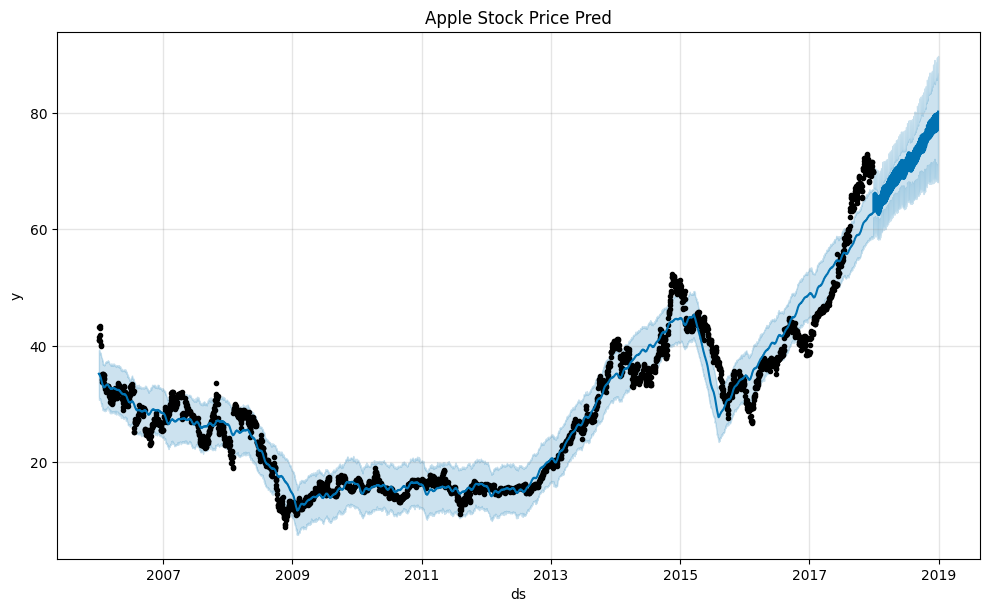

In [ ]:
#Facebook prophet forecasting
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# #Fetch the data
# data=yf.download('AAPL', start='2015-01-01',end=pd.Timestamp.today().strftime('2025-05-08'))
# data.reset_index(inplace=True)

# 📥 Load Data
data = pd.read_csv('stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

#Prepare for Prophet
# Instead of selecting 'Date' as a column, reset the index
# and then select 'Date' and 'Close'
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

#Fit the model
model=Prophet()
model.fit(df)

future=model.make_future_dataframe(periods=365)

#Prediction
forecast=model.predict(future)

#Plot the forecasting
model.plot(forecast)
plt.title('Apple Stock Price Pred')
plt.show()

ARIMA Forecasting (using Statsmodels)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

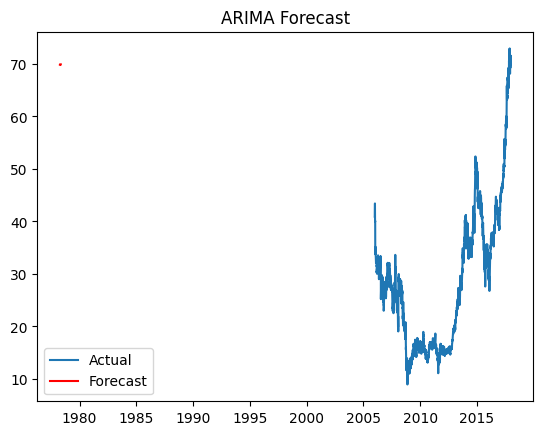

In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# # Load data
# data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
# data = data['Close']
# 📥 Load Data
data = pd.read_csv('stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Instead of selecting 'Date' as a column, reset the index
# and then select 'Date' and 'Close'
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Fit ARIMA model (adjust p,d,q)
# The original line causing the error:
# model = ARIMA(data, order=(5,1,0))

# The fix: Selecting the 'Close' column from the DataFrame
model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)

# Plot
plt.plot(data['Close'], label='Actual') # Plot the 'Close' column for the actual data
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

SARIMA Forecasting (with Seasonality)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

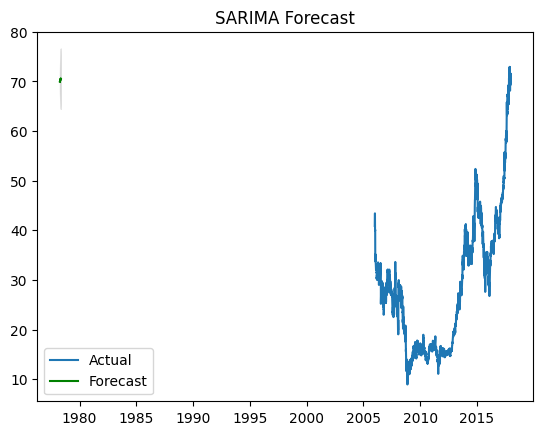

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (adjust parameters)
# Instead of passing the entire DataFrame, select the 'Close' column
model = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# Forecast
forecast = model_fit.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

# Plot
plt.plot(data['Close'], label='Actual')  # Plot the 'Close' column for actual data
forecast.predicted_mean.plot(label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

Prophet Forecasting (by Facebook/Meta)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5w7h7mj/bhnmu_fi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu5w7h7mj/zcrxm9x3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80181', 'data', 'file=/tmp/tmpu5w7h7mj/bhnmu_fi.json', 'init=/tmp/tmpu5w7h7mj/zcrxm9x3.json', 'output', 'file=/tmp/tmpu5w7h7mj/prophet_modelvb4a69nv/prophet_model-20250509062158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:21:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:22:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


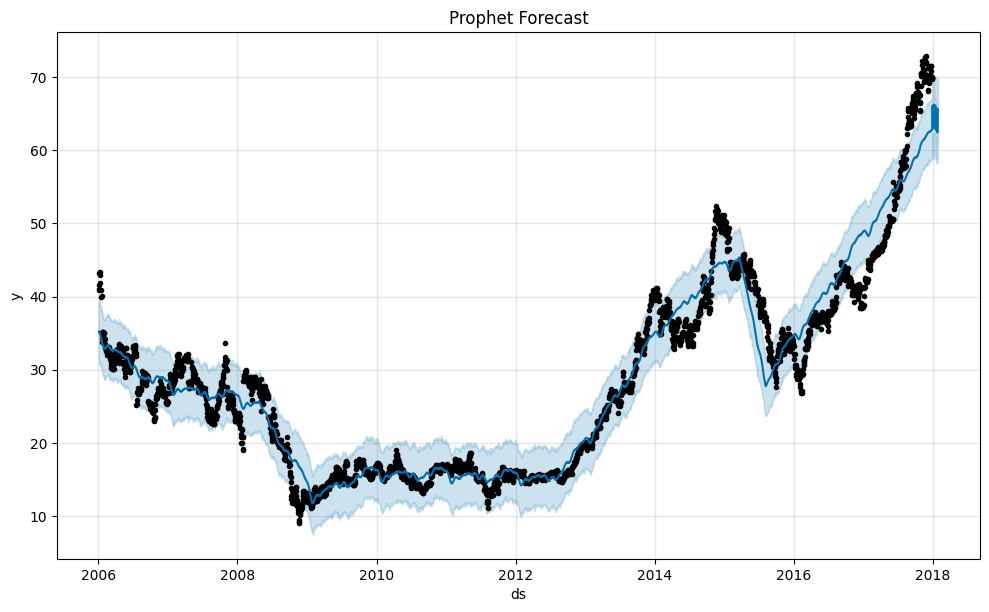

In [ ]:
from prophet import Prophet

# Prepare Data
df = data.reset_index()
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and Fit Prophet
model = Prophet()
model.fit(df)

# Future Dates
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

 LSTM Forecasting (using TensorFlow/Keras)

Shape of data: (3019, 6)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0175
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8342e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6403e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6943e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7935e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0816e-04
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1436e-04
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8257e-04
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.9527e-04
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5415e-04
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7186e-04
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6855e-04
Epoch 13/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4190e-04
Epoch 14/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2342e-04
Epoch 15/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8

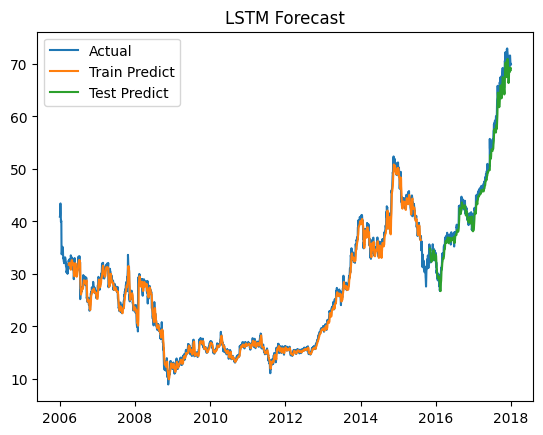

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf # Importing yfinance to load data

# 📥 Load Data
data = pd.read_csv('stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

#Prepare for Prophet
# Instead of selecting 'Date' as a column, reset the index
# and then select 'Date' and 'Close'
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Prepare Data
# Print the shape of 'data' to check if it's empty
print("Shape of data:", data.shape)
scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(data.values.reshape(-1,1))
# Check if 'data.values' is empty before reshaping
if data.empty:
    print("Error: 'data' DataFrame is empty. Please check data loading or preprocessing.")
else:
    # *** The Fix: Select only the 'Close' column for scaling ***
    scaled_data = scaler.fit_transform(data[['Close']].values.reshape(-1,1))


# Split into train/test
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape for LSTM input (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)

# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

# Inverse Scaling
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

# Plot
plt.plot(data.index, data['Close'], label='Actual') # Changed data.values to data['Close']
plt.plot(data.index[time_step:len(train_predict)+time_step], train_predict, label='Train Predict')
plt.plot(data.index[len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, label='Test Predict')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


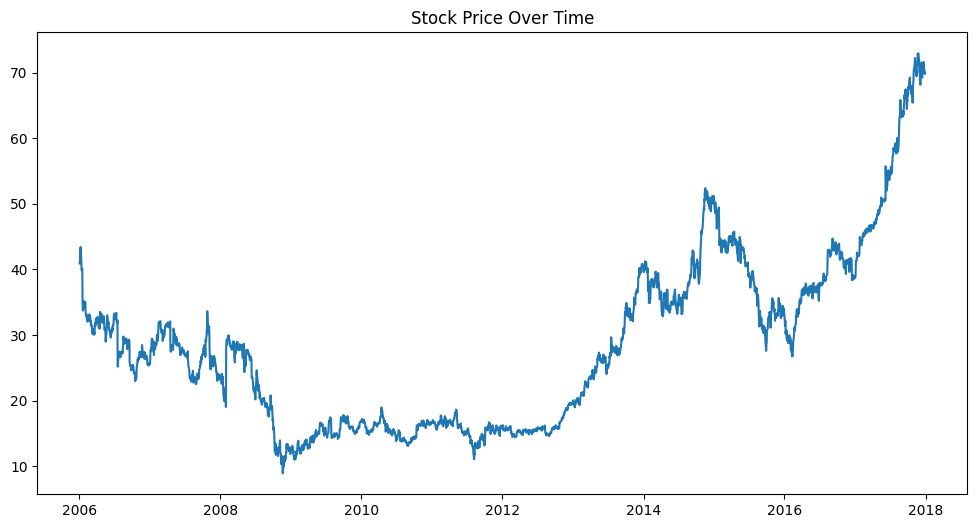

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0323
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3803e-04
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.8480e-04
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 4.8157e-04
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 4.1284e-04
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 3.7263e-04
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5499e-04
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.1372e-04
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.3029e-04
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.6138e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


2025-05-09 06:32:04.066 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 06:32:04.184 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-09 06:32:04.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 06:32:04.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 06:32:04.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 06:32:04.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 06:32:04.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 06:32:04.578 Thread 'MainThread': mi

DeltaGenerator()

In [ ]:
#Install Dependencies
#USE - pip install pandas numpy matplotlib seaborn plotly scikit-learn statsmodels prophet tensorflow streamlit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import streamlit as st

# 📥 Load Data
data = pd.read_csv('stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 📊 Visualize Trends
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title('Stock Price Over Time')
plt.show()

# 📏 ARIMA Forecasting
model_arima = ARIMA(data['Close'], order=(5,1,0))
result_arima = model_arima.fit()
forecast_arima = result_arima.forecast(steps=30)

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_arima)) # Calculate RMSE for the last 30 data points


# 📏 SARIMA Forecasting
model_sarima = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,0,12))
result_sarima = model_sarima.fit()
forecast_sarima = result_sarima.forecast(30)

# Calculate RMSE for SARIMA
rmse_sarima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_sarima)) # Calculate RMSE for the last 30 data points

# 📏 Prophet Forecasting
prophet_df = data.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']
model_prophet = Prophet()
model_prophet.fit(prophet_df)
future = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future)

# Calculate RMSE for Prophet
rmse_prophet = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_prophet['yhat'][-30:]))  # Calculate RMSE for the last 30 data points

# 📏 LSTM Forecasting
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data[['Close']])

X, y = [], []
for i in range(60, len(data_scaled)):
    X.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X, y, epochs=10, batch_size=32)

# Make predictions for LSTM
# Define scaled_data here, before it's used
scaled_data = scaler.fit_transform(data[['Close']].values)  # Reshape if necessary
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]


def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
_, X_test = create_dataset(test, time_step) # Recalculate X_test
# The original line causing the error:
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Reshape X_test to 3D, but with only one feature
X_test = X_test.reshape(X_test.shape[0], 1, 1)


inputs = data_scaled[len(data_scaled) - len(X_test) - 60:]
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test_lstm = []
for i in range(60, inputs.shape[0]):
    X_test_lstm.append(inputs[i - 60:i, 0])
X_test_lstm = np.array(X_test_lstm)
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

lstm_predictions = model_lstm.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(data['Close'][-30:], lstm_predictions[-30:]))  # Calculate RMSE for the last 30 data points



# 📊 Streamlit Dashboard
st.title("Stock Market Forecast Dashboard")
st.line_chart(data['Close'])
st.subheader("ARIMA Forecast")
st.line_chart(forecast_arima)
st.subheader("SARIMA Forecast")
st.line_chart(forecast_sarima)
st.subheader("Prophet Forecast")
st.line_chart(forecast_prophet[['ds', 'yhat']].set_index('ds').tail(30))

st.subheader("Model Accuracy (RMSE)")
st.write(f'ARIMA RMSE: {rmse_arima:.2f}')
st.write(f'SARIMA RMSE: {rmse_sarima:.2f}')
st.write(f'Prophet RMSE: {rmse_prophet:.2f}')
st.write(f'LSTM RMSE: {rmse_lstm:.2f}')

st.success("All forecasts generated successfully!")